In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

Main Objective

To identify and quantify the specific clinical and pathological factors that are most strongly associated with the recurrence of breast cancer within the observed patient cohort, thereby describing the key risk profile for recurrence.

Problem statement

Breast cancer recurrence remains one of the most critical challenges in oncology, as it significantly impacts patient survival and quality of life. Despite advances in treatment, many patients experience a return of the disease after initial therapy, often due to complex interactions among clinical, pathological, and treatment-related factors. Understanding which patient characteristics such as tumor size, menopausal status, lymph node involvement, or radiation therapy are most strongly associated with recurrence can help guide more targeted interventions and improve long-term outcomes. This study aims to analyze patient data to identify key predictors and patterns associated with breast cancer recurrence using descriptive, bivariate, and multivariate analyses.

Research Questions

Univariate Analysis
-What is the baseline percentage of patients in the study who experienced a breast cancer recurrence?
-How are the patients distributed across different age ranges?
-Which menopause category has the highest number of patients?
-Which is the most common tumor size range?
-Which inv-node category is most frequent?
-What is the most common malignancy level?
-Which breast side (left or right) is more commonly affected?
-Which breast quadrant is most affected?
-How many patients received radiation therapy?

Bivariate Analysis
-Is there a relationship between menopausal status and recurrence? 
-Does tumor size category relate to recurrence rate? 
-Is there an association between breast side (left or right) and recurrence? 
-Does receiving radiation therapy relate to recurrence? 
-Which breast quadrant is most affected by recurrence?

Multivariate Analysis
-Does the recurrence rate differ across tumor size categories and menopausal status?
-For patients with large tumors (e.g., ≥30mm), how does the recurrence rate compare between those who did and did not receive radiation therapy?


In [3]:
df = pd.read_excel(r"C:/Users/User/Desktop/pydata/pydata_capstone/recurrent_breastcancer.xlsx")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          286 non-null    object
 1   menopause    286 non-null    object
 2   tumor-size   286 non-null    object
 3   inv-nodes    286 non-null    object
 4   node-caps    278 non-null    object
 5   deg-malig    286 non-null    int64 
 6   breast       286 non-null    object
 7   breast-quad  285 non-null    object
 8   irradiat     286 non-null    object
 9   target       286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


In [ ]:
Data Cleaning

Handling missing values

In [43]:
# Check for missing values in each column
df.isnull().sum()

age                   0
menopause             0
tumor-size            0
inv-nodes             0
node-caps             8
deg-malig             0
breast                0
breast-quad           0
irradiat              0
target                0
Recurrence_Numeric    0
dtype: int64

In [44]:
#Filling the missing values
df['breast-quad'].fillna(df['breast-quad'].mode()[0], inplace=True)
df['node-caps'].fillna(df['node-caps'].mode()[0], inplace=True)

df.isnull().sum()

C:\Users\User\AppData\Local\Temp\ipykernel_17840\3845544955.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['breast-quad'].fillna(df['breast-quad'].mode()[0], inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_17840\3845544955.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

age                   0
menopause             0
tumor-size            0
inv-nodes             0
node-caps             0
deg-malig             0
breast                0
breast-quad           0
irradiat              0
target                0
Recurrence_Numeric    0
dtype: int64

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 286 non-null    object
 1   menopause           286 non-null    object
 2   tumor-size          286 non-null    object
 3   inv-nodes           286 non-null    object
 4   node-caps           286 non-null    object
 5   deg-malig           286 non-null    int64 
 6   breast              286 non-null    object
 7   breast-quad         286 non-null    object
 8   irradiat            286 non-null    object
 9   target              286 non-null    object
 10  Recurrence_Numeric  286 non-null    int64 
dtypes: int64(2), object(9)
memory usage: 24.7+ KB


Stripping white spaces

In [46]:
# Remove leading and trailing white spaces in all string columns
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

Standardizing text case for consistency

In [47]:
df = df.apply(lambda x: x.str.lower() if x.dtype == "object" else x)

Univariate Analysis

In [ ]:
#No. of patients who experience recurrence
# Frequency of recurrence
recurrence_counts = df['target'].value_counts()

# Percentage of recurrence
recurrence_percent = df['target'].value_counts(normalize=True) * 100

recurrence_summary = pd.DataFrame({
    'Frequency': recurrence_counts,
    'Percentage (%)': recurrence_percent.round(2)
})

print(recurrence_summary)

                      Frequency  Percentage (%)
target                                         
no-recurrence-events        201           70.28
recurrence-events            85           29.72


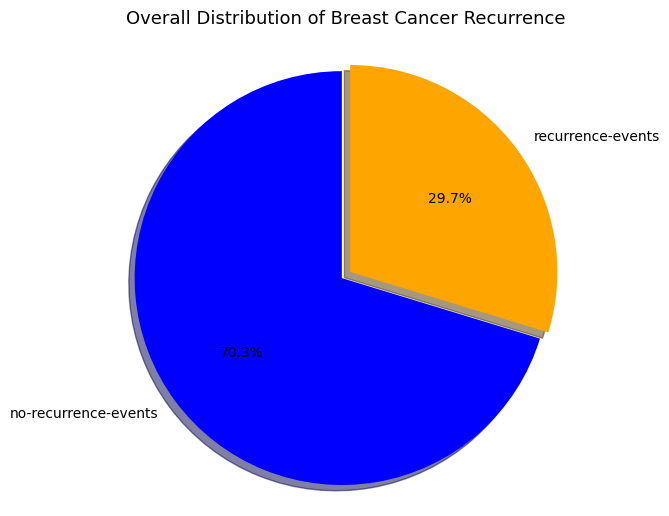

In [48]:
#visualization on pie chat
colors = ['blue', 'orange'] 
explode = (0, 0.05)  

plt.figure(figsize=(6,6))
plt.pie(recurrence_counts,
        labels=recurrence_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        shadow=True,
        colors=colors,
        explode=explode)

plt.title("Overall Distribution of Breast Cancer Recurrence", fontsize=13, pad=15)

plt.axis('equal')
plt.show()

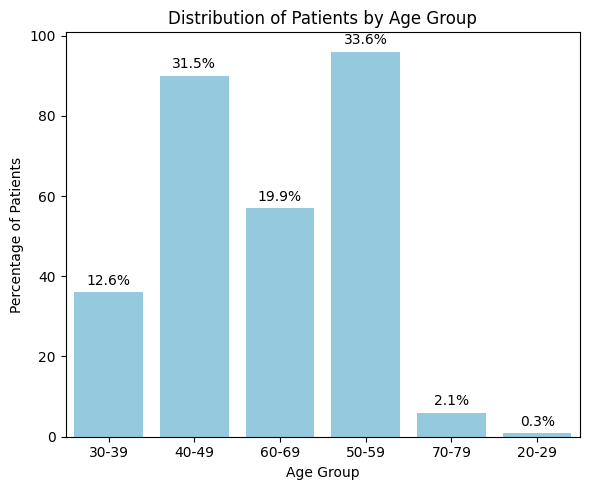

In [ ]:
# How are the patients distributed across different age ranges?

age_order = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79']

plt.figure(figsize=(6,5))
ax = sns.countplot(x='age', data=df, color='skyblue')

total = len(df)

for container in ax.containers:
    labels = [f'{(v.get_height()/total)*100:.1f}%' for v in container]
    ax.bar_label(container, labels=labels, label_type='edge', fontsize=10, color='black', padding=3)

plt.title("Distribution of Patients by Age Group", fontsize=12)
plt.xlabel("Age Group")
plt.ylabel("Percentage of Patients")
plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_17840\2209104930.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='menopause', data=df, palette='Set2')


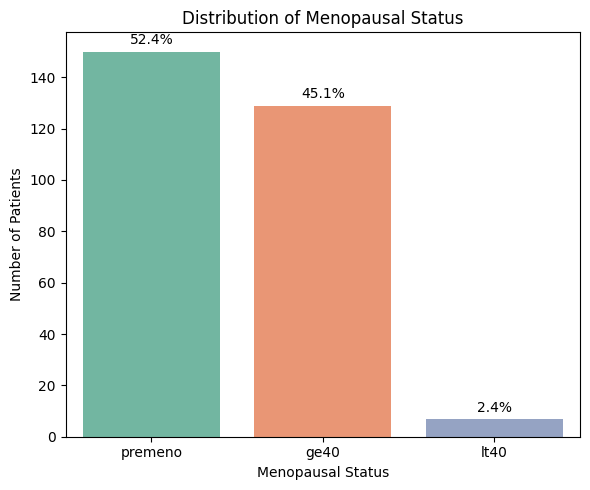

In [55]:
#Which menopause category has the highest number of patients?
plt.figure(figsize=(6,5))
ax = sns.countplot(x='menopause', data=df, palette='Set2')

total = len(df)

for container in ax.containers:
    labels = [f'{(v.get_height()/total)*100:.1f}%' for v in container]
    ax.bar_label(container, labels=labels, label_type='edge', fontsize=10, padding=3, color='black')

plt.title("Distribution of Menopausal Status", fontsize=12)
plt.xlabel("Menopausal Status")
plt.ylabel("Number of Patients")
plt.tight_layout()
plt.show()

In [10]:
# Most common tumor size and its frequency
most_common = df['tumor-size'].value_counts().head(1)
print(most_common)

tumor-size
30-34    60
Name: count, dtype: int64


In [14]:
#Most frequent inv-nodes category
most_common_invnode = df['inv-nodes'].value_counts().head(1)
print(most_common_invnode)

inv-nodes
0-2    213
Name: count, dtype: int64


In [15]:
#most common malignancy level
most_common_malignancy = df['deg-malig'].value_counts().head(1)
print(most_common_malignancy)

deg-malig
2    130
Name: count, dtype: int64


In [16]:
#most commonly affected breast side
df['breast'].value_counts()

breast
left     152
right    134
Name: count, dtype: int64

In [ ]:
#which breast quadrant is mostly affected

most_common_quad = df['breast-quad'].value_counts().head(1)
print(most_common_quad)

breast-quad
left_low    110
Name: count, dtype: int64


In [18]:
#How many patients received radiation therapy
df['irradiat'].value_counts()

irradiat
no     218
yes     68
Name: count, dtype: int64

Bivariate Analysis

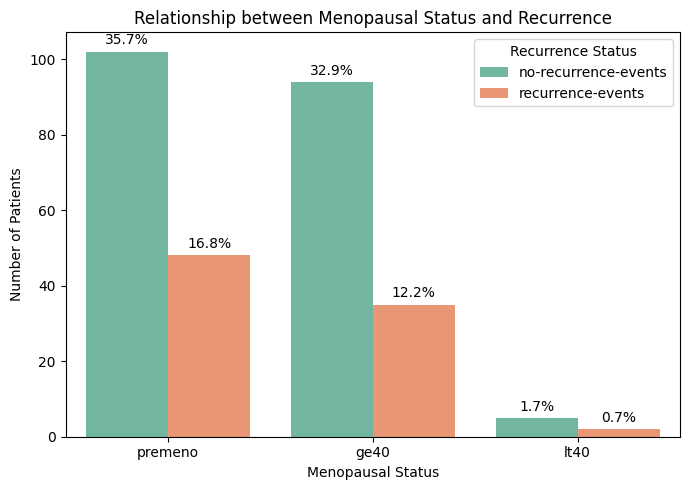

In [ ]:
#Menopausal status vs recurrence

plt.figure(figsize=(7, 5))
ax = sns.countplot(x='menopause', hue='target', data=df, palette='Set2')

total = len(df)

for container in ax.containers:
    labels = [f'{(v.get_height()/total)*100:.1f}%' for v in container]
    ax.bar_label(container, labels=labels, label_type='edge', fontsize=10, padding=3, color='black')

plt.title('Relationship between Menopausal Status and Recurrence', fontsize=12)
plt.xlabel('Menopausal Status')
plt.ylabel('Number of Patients')
plt.legend(title='Recurrence Status')
plt.tight_layout()
plt.show()


-The dataset shows a clear imbalance in the Menopausal Status of the patients.
-The premeno (pre-menopausal) and ge40 (age ≥40, likely post-menopausal or perimenopausal) groups represent the vast majority of the patient population.
-The lt40 (age <40) group is a very small minority, with fewer than 10 patients in total.
-The premeno group has the highest number of recurrence events  compared to the other groups, and the highest proportion of recurrence among the three groups.
-The recurrence rate in the ge40 group is lower than the premeno group, suggesting that being in the ge40 status might be associated with a slightly lower relative risk of recurrence compared to premeno.
-While the lt40 group has a substantial recurrence rate, its absolute contribution to the total number of recurrence events is negligible due to the extremely small sample size.
-However,to confirm if there exists a relationxship between the 2 variables further test with chi square would be helpful.

Null hypothesis:There is no significant association between menopausal status and breast cancer recurrence.
Alternative hypothesis:There is a significant association between menopausal status and breast cancer recurrence.

If p ≤ 0.05, we reject the null hypothesis (there is a significant relationship).
If p > 0.05, we fail to reject the null hypothesis (no significant relationship).

In [72]:

contingency_table = pd.crosstab(df['menopause'], df['target'])
print("Contingency Table:")
print(contingency_table)

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("\nChi-Square Test Results:")
print(f"Chi2 Statistic: {chi2:.4f}")
print(f"Degrees of Freedom: {dof}")
print(f"P-Value: {p:.4f}")

Contingency Table:
target     no-recurrence-events  recurrence-events
menopause                                         
ge40                         94                 35
lt40                          5                  2
premeno                     102                 48

Chi-Square Test Results:
Chi2 Statistic: 0.7915
Degrees of Freedom: 2
P-Value: 0.6732


-A Chi-square test of independence was conducted to determine whether there is an association between menopausal status and breast cancer recurrence. 
-The test revealed no statistically significant relationship between the two variables, χ²= 0.79, p = 0.67. This suggests that menopausal status does not appear to influence recurrence rates in this dataset.

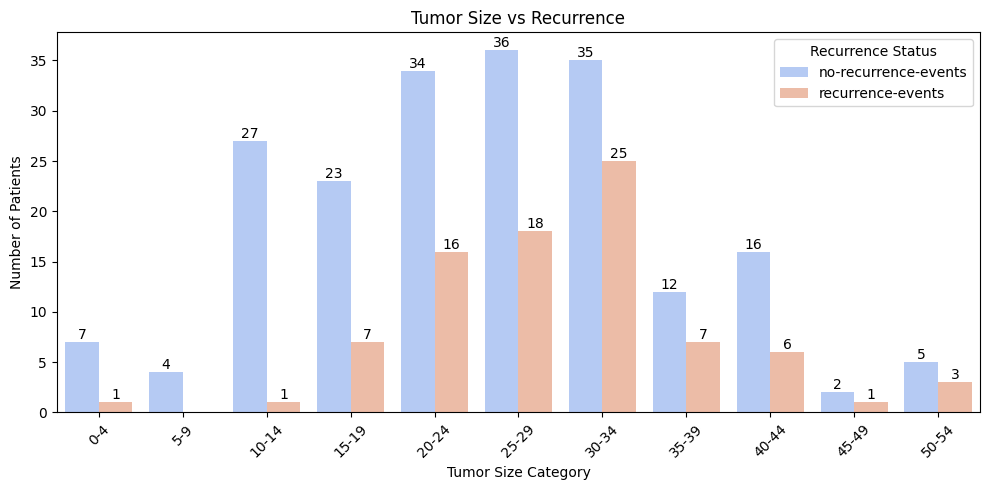

In [ ]:
#Tumor size vs recurrence

order = sorted(df['tumor-size'].dropna().unique(),
               key=lambda x: int(x.split('-')[0]) if '-' in x else int(x))

plt.figure(figsize=(10, 5))
ax = sns.countplot(x='tumor-size', hue='target', data=df, palette='coolwarm', order=order)

for container in ax.containers:
    ax.bar_label(container)

plt.title('Tumor Size vs Recurrence', fontsize=12)
plt.xlabel('Tumor Size Category')
plt.ylabel('Number of Patients')
plt.legend(title='Recurrence Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

-The majority of patients, both those with and without recurrence, fall into the intermediate tumor size categories of 20-24 mm, 25-29 mm, and 30-34 mm. These three categories account for the highest absolute number of patients in the dataset.
-The 30-34 mm category has the highest absolute number of recurrence events at 25 patients. The 25-29 mm category follows closely with 18 recurrence events, and the 20-24 mm category has 16. These three groups contribute the most to the overall recurrence burden.
-The smaller (0-4 mm, 5-9 mm, 10-14 mm) and largest (45-49 mm, 50-54 mm) tumor size categories have very low patient counts, both for recurrence and no-recurrence events.
-The recurrence rate generally shows an increasing trend and is highest in the 20-34 mm range, peaking at the 30-34 mm category. This suggests that as the tumor size progresses from 20 mm to 34 mm, the patient's prognosis significantly worsens.
-However,to confirm if a relationship exists between these two variable, a further analysis with chi square test would be helpful.

Null hypothesis:There is no significant association between tumor size and recurrence
Alternative hypothesis:There is a significant association between tumor size and recurrence

In [ ]:

contingency_table = pd.crosstab(df['tumor-size'], df['target'])

print("Contingency Table:")
print(contingency_table)

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("\nChi-Square Test Results:")
print(f"Chi2 Statistic: {chi2:.4f}")
print(f"Degrees of Freedom: {dof}")
print(f"P-Value: {p:.4f}")


Contingency Table:
target      no-recurrence-events  recurrence-events
tumor-size                                         
0-4                            7                  1
10-14                         27                  1
15-19                         23                  7
20-24                         34                 16
25-29                         36                 18
30-34                         35                 25
35-39                         12                  7
40-44                         16                  6
45-49                          2                  1
5-9                            4                  0
50-54                          5                  3

Chi-Square Test Results:
Chi2 Statistic: 17.9157
Degrees of Freedom: 10
P-Value: 0.0564


-The Chi-square test for association between tumor size and recurrence yielded a χ² statistic of 17.9157 a p-value of 0.0564. -Since the p-value is slightly above the 0.05 significance threshold, we fail to reject the null hypothesis. This suggests that there is no statistically significant association between tumor size and recurrence. However, the result is near the threshold, indicating a possible weak trend where patients with larger tumors may have a higher recurrence rate.

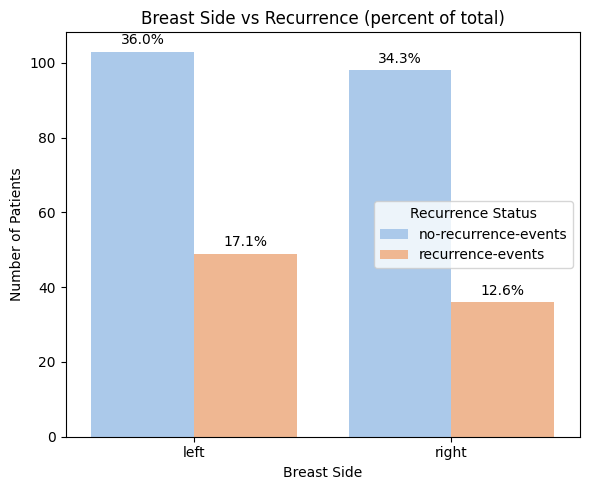

In [ ]:
#Breast side vs recurrence
plt.figure(figsize=(6, 5))
ax = sns.countplot(x='breast', hue='target', data=df, palette='pastel')

subset = df.dropna(subset=['breast','target'])
total = len(subset)

for container in ax.containers:
    labels = [f'{(v.get_height()/total)*100:.1f}%' for v in container]
    ax.bar_label(container, labels=labels, label_type='edge', fontsize=10, padding=3, color='black')

plt.title('Breast Side vs Recurrence (percent of total)', fontsize=12)
plt.xlabel('Breast Side')
plt.ylabel('Number of Patients')
plt.legend(title='Recurrence Status')
plt.tight_layout()
plt.show()


-There is a slight predominance of left-sided cases in this dataset.
-The left side contributes a larger absolute percentage to the total number of recurrence events compared to the right side.
-This suggests that breast side may not have a strong influence on recurrence, a finding that would need to be statistically confirmed using a Chi-square test.

Null hypothesis:There is no significant association between breast side and recurrence
Alternative hypothesis:There is significant association between breast side and recurrence

In [ ]:

contingency_table = pd.crosstab(df['breast'], df['target'])

print("Contingency Table:")
print(contingency_table)

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("\nChi-Square Test Results:")
print(f"Chi2 Statistic: {chi2:.4f}")
print(f"Degrees of Freedom: {dof}")
print(f"P-Value: {p:.4f}")

Contingency Table:
target  no-recurrence-events  recurrence-events
breast                                         
left                     103                 49
right                     98                 36

Chi-Square Test Results:
Chi2 Statistic: 0.7433
Degrees of Freedom: 1
P-Value: 0.3886


-The Chi-square test was conducted to examine the relationship between breast side and cancer recurrence. 
-The results showed no statistically significant association between the two variables. Although recurrence appeared slightly higher in the left breast (49 cases) compared to the right (36 cases), the difference was not significant. This suggests that breast side does not have a meaningful influence on recurrence rates in this dataset.

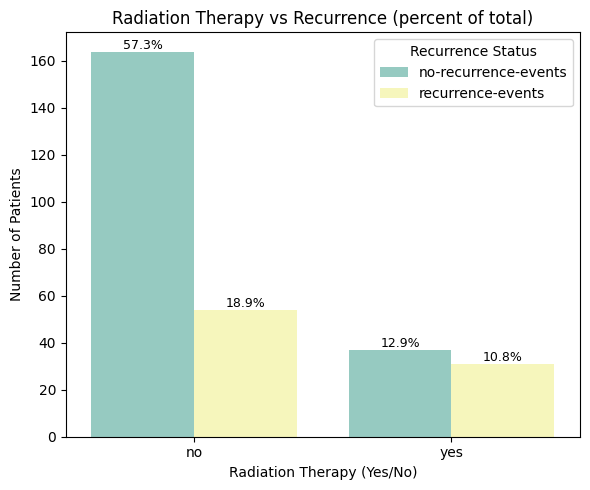

In [61]:
#Radiation therapy vs recurrence
plt.figure(figsize=(6, 5))

ax = sns.countplot(x='irradiat', hue='target', data=df, palette='Set3')

total = len(df)

for container in ax.containers:
    counts = container.datavalues
    percentages = [f'{(count/total)*100:.1f}%' for count in counts]
    ax.bar_label(container, labels=percentages, label_type='edge', fontsize=9)

plt.title('Radiation Therapy vs Recurrence (percent of total)', fontsize=12)
plt.xlabel('Radiation Therapy (Yes/No)')
plt.ylabel('Number of Patients')
plt.legend(title='Recurrence Status')
plt.tight_layout()
plt.show()

-A large majority of the patients in this study were not treated with radiation therapy.
-The absolute burden of recurrence is much higher in the group that did not receive radiation compared to the group that did receive radiation.
*Clinical Selection Bias: Radiation therapy is typically not given indiscriminately. It is usually reserved for patients with higher risk features e.g., larger tumors
The "Yes Radiation" group likely consists of patients who were already at a much higher risk of recurrence at baseline. Despite receiving the treatment, their underlying poor prognosis drove the high recurrence rate.
-Recurrence events were somewhat more frequent in those who had not undergone radiation therapy. This suggests that radiation therapy may have an influence on recurrence, a finding that would need to be statistically confirmed using a Chi-square test.

Null hypothesis:There is no significant relationship between radiation therapy and recurrence
Alternative hypothesis:There is a significant relationship between radiation therapy and recurrence

In [ ]:

contingency_table = pd.crosstab(df['irradiat'], df['target'])

print("Contingency Table:")
print(contingency_table)

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("\nChi-Square Test Results:")
print(f"Chi2 Statistic: {chi2:.4f}")
print(f"Degrees of Freedom: {dof}")
print(f"P-Value: {p:.4f}")

Contingency Table:
target    no-recurrence-events  recurrence-events
irradiat                                         
no                         164                 54
yes                         37                 31

Chi-Square Test Results:
Chi2 Statistic: 9.7806
Degrees of Freedom: 1
P-Value: 0.0018


Most of the patients with recurrence events had not undergone radiation therapy.The chi square test revealed a significant association between the two variables indicating that radiation therapy has a significant impact on recurrence in this dataset.

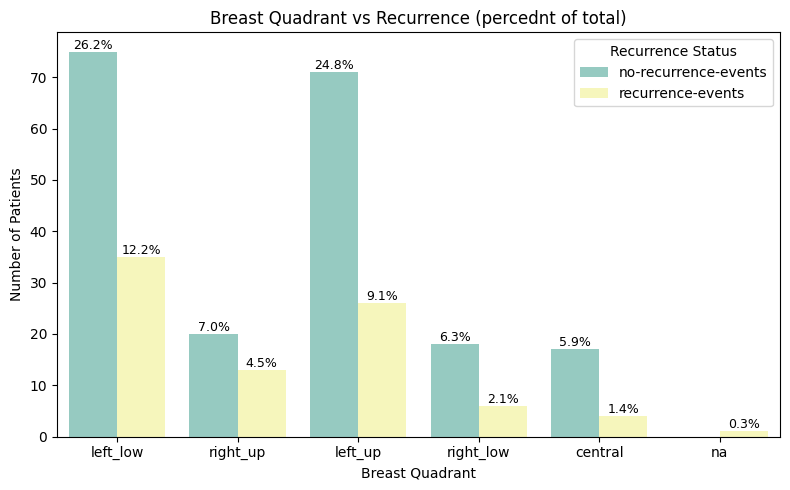

In [62]:
#Breast quadrant vs recurrence
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='breast-quad', hue='target', data=df, palette='Set3')

total= len(df)
for container in ax.containers:
    counts= container.datavalues
    percentages= [f'{(count/total)*100:.1f}%' for count in counts]
    ax.bar_label(container, labels = percentages, label_type='edge', fontsize =9)
plt.title('Breast Quadrant vs Recurrence (percednt of total)', fontsize=12)
plt.xlabel('Breast Quadrant')
plt.ylabel('Number of Patients')
plt.legend(title='Recurrence Status')
plt.tight_layout()
plt.show()

-The left breast is overwhelmingly the most common site for the primary tumor in this dataset, particularly the left lower and left upper quadrants.
-The majority of the recurrence burden is driven by tumors originating in the left breast quadrants.
-To investigate where there exists an association between the variables a chi square test was done.

Null hypothesis:The is no significant association between breast quadrant and recurrence
Alternative hypothesis:There is a significant association between breast quadrant and recurrence

In [ ]:

contingency_table = pd.crosstab(df['breast-quad'], df['target'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("P-value:", p)


Chi-square Statistic: 5.871094841998962
Degrees of Freedom: 5
P-value: 0.3189647481357057


-The Chi-Square test showed no statistically significant association between breast-quad and recurrence status (χ² = 5.871, p = 0.319).
-This means that differences in recurrence across categories of breast quadrant could be due to chance rather than a real underlying relationship.

Multivariate Analysis

<Figure size 1000x600 with 0 Axes>

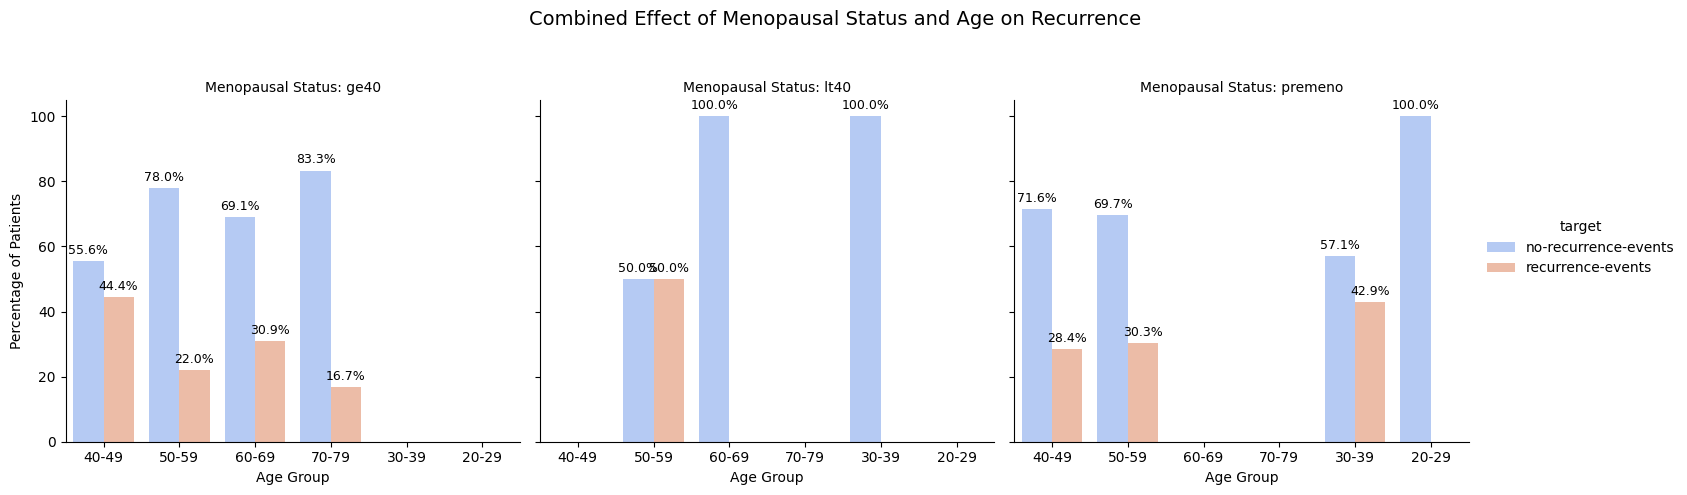

In [ ]:
#Menopausal status*Age*Recurrence

grouped = (
    df.groupby(['menopause', 'age', 'target'])
    .size()
    .reset_index(name='count')
)

grouped['percent'] = (
    grouped.groupby(['menopause', 'age'])['count']
    .apply(lambda x: 100 * x / x.sum())
    .values
)

plt.figure(figsize=(10, 6))
g = sns.catplot(
    data=grouped,
    x='age',
    y='percent',
    hue='target',
    col='menopause',
    kind='bar',
    palette='coolwarm',
    height=5,
    aspect=1
)

for ax in g.axes.flat:
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=9, padding=3)

g.set_titles("Menopausal Status: {col_name}")
g.set_axis_labels("Age Group", "Percentage of Patients")
plt.subplots_adjust(top=0.8)
g.fig.suptitle("Combined Effect of Menopausal Status and Age on Recurrence", fontsize=14)
plt.show()


The multivariate bar plots display recurrence percentages across age groups separately for each menopausal status. The plots suggest higher recurrence proportions in middle-age bins (30–49) for both premenopausal and postmenopausal groups (e.g., ~43% recurrence in premenopausal 30–39, ~44% in postmenopausal 40–49). However, many age×menopause combinations contain few observations, especially in the lt40 strata, so percentages are unstable. A Cochran–Mantel–Haenszel test or multivariable logistic regression — adjusting for tumor size, node involvement, and treatment — is recommended to confirm whether age and menopausal status independently or jointly predict recurrence.

In [75]:
print(df.columns)

Index(['age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'deg-malig',
       'breast', 'breast-quad', 'irradiat', 'target', 'Recurrence_Numeric'],
      dtype='object')


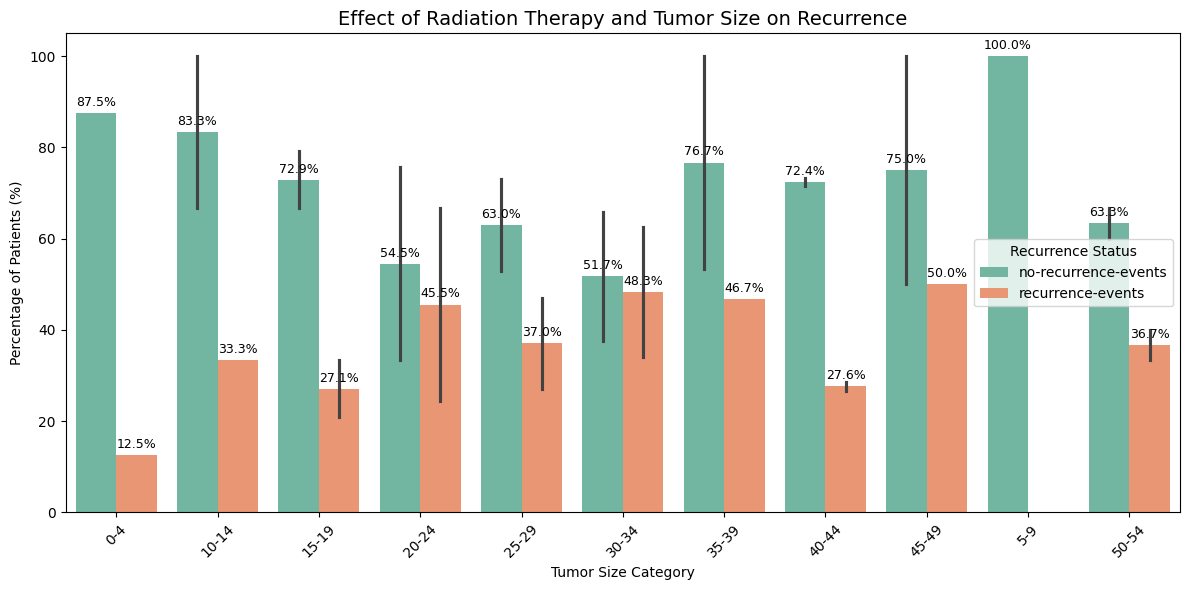

In [ ]:
#Tumor size*Radiation therapy*Recurrence

df_copy = df.copy()

grouped = (
    df_copy.groupby(['irradiat', 'tumor-size', 'target'])
    .size()
    .reset_index(name='count')
)

grouped['percentage'] = grouped.groupby(['irradiat', 'tumor-size'])['count'].transform(
    lambda x: 100 * x / x.sum()
)

plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=grouped,
    x='tumor-size',
    y='percentage',
    hue='target',
    palette='Set2'
)

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', fontsize=9, padding=3)

plt.title('Effect of Radiation Therapy and Tumor Size on Recurrence', fontsize=14)
plt.xlabel('Tumor Size Category')
plt.ylabel('Percentage of Patients (%)')
plt.legend(title='Recurrence Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


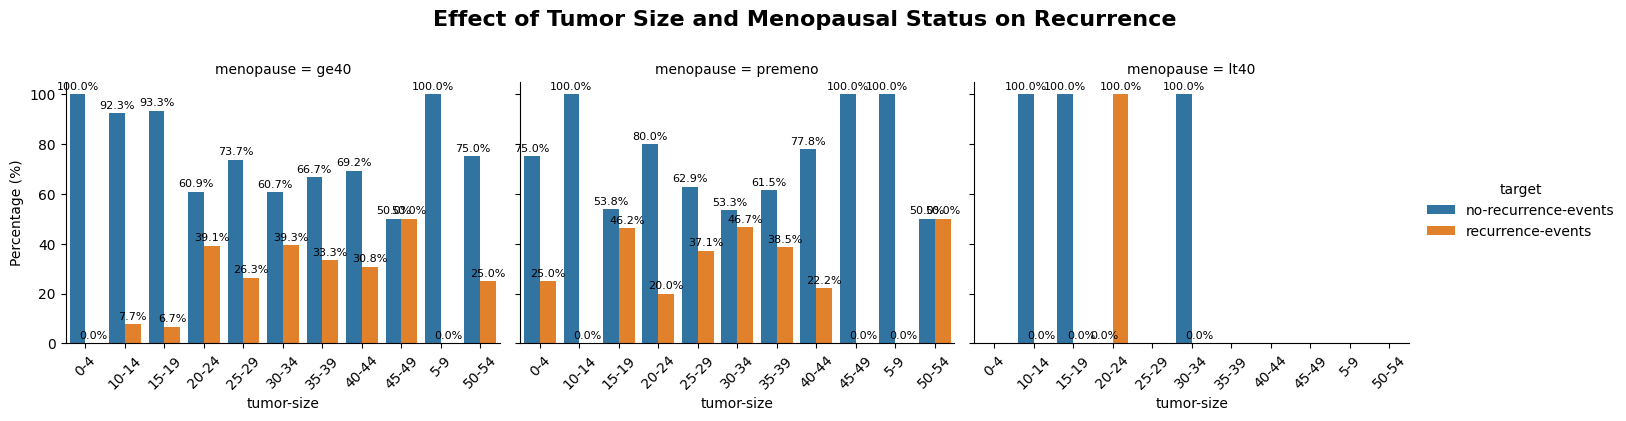

In [ ]:
#-Does the recurrence rate differ across tumor size categories and menopausal status?

data = (
    df.groupby(['tumor-size', 'menopause', 'target'])
    .size()
    .unstack(fill_value=0)
    .stack()
    .reset_index(name='count')
)

data['percentage'] = (
    data.groupby(['tumor-size', 'menopause'])['count']
    .transform(lambda x: 100 * x / x.sum())
)

g = sns.catplot(
    data=data,
    x='tumor-size',
    y='percentage',
    hue='target',
    col='menopause',
    kind='bar',
    errorbar=None,  
    height=4,
    aspect=1.2
)

for ax in g.axes.flat:
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%', fontsize=8, padding=2)
    ax.set_ylabel('Percentage (%)')
    ax.tick_params(axis='x', rotation=45)  

plt.subplots_adjust(top=0.8)
g.fig.suptitle('Effect of Tumor Size and Menopausal Status on Recurrence',
               fontsize=16, fontweight='bold')
plt.show()


-The ge40 group generally maintains lower recurrence rates across most tumor sizes compared to the 'premeno' group. The highest recurrence rate in this group is 50.0% (at 45-49mm).
-The premeno group experiences the highest recurrence rates across several common tumor size ranges. The highest recurrence rate in this group is 50.0% (50-54mm).
-The data for the le40 group is too sparse (very small sample size, as seen by the high percentage of 100% or 0% across most categories) to draw reliable conclusions about recurrence risk.
-Menopausal status acts as an effect modifier. Being pre-menopausal significantly amplifies the risk of recurrence, particularly for small and medium-sized tumors (10-19mm), where the difference in risk between the two menopausal groups is most pronounced.